This file is to test the micrograd on a more complex toy dataset.

In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt
from micrograd.nn import Module, MLP
from micrograd.engine import Value
%matplotlib inline

In [16]:
np.random.seed(444)
random.seed(444)

In [17]:
from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=200, noise=0.1)
print(X.shape, y.shape)

(200, 2) (200,)


In [18]:
# BCE loss
def bce(ytrue, ypred): # make sure that labels are 0 and 1
    bce = -np.mean(ytrue * np.log(ypred) + (1-ytrue)*np.log(1-ypred))
    return bce

In [ ]:
def hinge_loss(ytrue, ypred):
    data_loss = sum((1 - ygt*yout).relu() for ygt, yout in zip(ytrue, ypred))  # relu() is also maxing it from (0, +val)
    data_loss = data_loss * (1/len(ytrue))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum(p*p for p in model.parameters())
    total_loss = data_loss + reg_loss
    
    accuracy = [(yi.data>0) == (yr>0) for yi, yr in zip(ypred, ytrue)]
    accuracy = sum(accuracy)/len(accuracy)
    return total_loss, accuracy

In [19]:
np.unique(y)

array([0, 1])

In [20]:
y = 2 * y - 1 # changing class representation of 0 to -1 for hinge loss
np.unique(y)

array([-1,  1])

In [21]:
np.unique(y)


array([-1,  1])

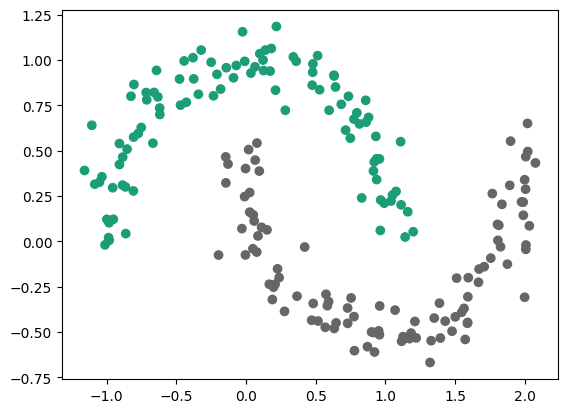

In [22]:
# Visualizing the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Dark2')

In [23]:
# initializing the model
model = MLP(2, [16, 16, 1])
print(model)

MLP of [Layer of [ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2)]
Layer of [ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16)]
Layer of [LinearNeuron(16)]
]


In [24]:
# hyperparameters of the model
lr = 0.01
steps = 100

define a new loss function.\
From the visualization of the dataset, we can see that the datapoints can be seperated by a hyperplane. So we can take a SVM type approach.\
For that we will implement hinge loss\
hinge Loss: L = max(0, 1 - y*y')\
this is used for binary classification. Labels (y) should be -1 and 1 and model outputs (y') should be linear.\
intuition\
For the loss to be 0, y*y' should be >= 1\
so, for class +1, y * y' >= 1, or y' >= 1\
similarly for class -1, y * y' >= 1, or y <= -1\
These are highly confident predictions\
in case of 0 < y*y' < 1, loss is +ve. We are getting right predictions, but they are not highly confident, hence penalized.\
Higher the difference between true label and y', higher the y*y', hence, higher the penalization.

In [26]:
# training loop

for k in range(steps):
    # forward pass for Hinge Loss
    yhat = [model(x) for x in X]
    loss, accuracy = hinge_loss(y, yhat)
    # forward pass for BCE
    # yhat = [model(x).sigmoid() for x in X]  # since we are using BCE loss, we need probabilities, hence applying sigmoid to the output
    # loss = sum(((ygt* (yout.log()) + (1-ygt)*((1-yout).log())) for yout, ygt in zip(yhat, y)), Value(0))
    # loss = -loss/len(yhat)
    
    # backward pass
    model.zero_grad()
    loss.backward()
    
    # value update
    for p in model.parameters():
        p.data += -lr * p.grad
    
    print(f'step {k}, Loss: {loss.data}, Accuracy: {accuracy}')

step 0, Loss: 1.5787875970738543, Accuracy: 0.5
step 1, Loss: 1.5541118152726094, Accuracy: 0.5
step 2, Loss: 1.5303365535708973, Accuracy: 0.5
step 3, Loss: 1.5075441548270154, Accuracy: 0.5
step 4, Loss: 1.4851671177669574, Accuracy: 0.5
step 5, Loss: 1.4633345701257383, Accuracy: 0.5
step 6, Loss: 1.441945879978758, Accuracy: 0.5
step 7, Loss: 1.4207548784900703, Accuracy: 0.5
step 8, Loss: 1.399828968171259, Accuracy: 0.5
step 9, Loss: 1.3790635768000121, Accuracy: 0.505
step 10, Loss: 1.3587100313707319, Accuracy: 0.505
step 11, Loss: 1.3386129324179246, Accuracy: 0.515
step 12, Loss: 1.3188826750932185, Accuracy: 0.515
step 13, Loss: 1.2997494535066318, Accuracy: 0.515
step 14, Loss: 1.2808842415615422, Accuracy: 0.515
step 15, Loss: 1.2622487095664432, Accuracy: 0.525
step 16, Loss: 1.2438150095528406, Accuracy: 0.525
step 17, Loss: 1.2256236306701804, Accuracy: 0.535
step 18, Loss: 1.2076667390530207, Accuracy: 0.54
step 19, Loss: 1.1898417052687718, Accuracy: 0.545
step 20, Lo

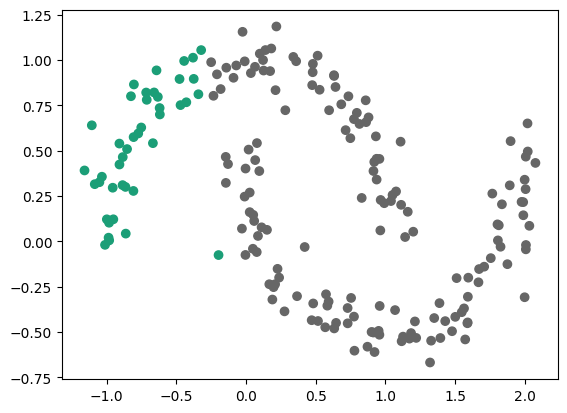

In [27]:
ypred = [1 if model(x).sigmoid().data > 0.5 else 0 for x in X]
# plt.plot(ypred)
plt.scatter(X[:, 0], X[:, 1], c=ypred, cmap='Dark2')

In [28]:
temp = np.random.permutation(200)[:10]
print(X[temp])

[[ 1.51034755 -0.20344751]
 [ 1.32747703 -0.54866781]
 [-0.14541325  0.46522947]
 [ 1.80650908  0.00458478]
 [ 0.73442812  0.7995047 ]
 [-0.75137997  0.62739659]
 [ 0.3658804  -0.30313727]
 [ 0.6458508  -0.45041991]
 [ 0.95114701 -0.49442314]
 [ 0.59245287 -0.33277297]]
